In [109]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [110]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=1000)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [111]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogrammable silicon photonics has also found new applications in quantum2 and\nclassical 3 information processing. A key component of programmable silicon\nphotonic integrated circuits (PICs) is the phase shifter, traditionally\nrealized via the thermo-optic or plasma dispersion effect which are weak,\nvolatile, and power hungry. A non-volatile phase shifter can circumvent these\nlimitations by requiring zero power to maintain the switched phases. Previously\nnon-volatile phase modulation was

In [112]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=1000)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [113]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [114]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [115]:
tavily.invoke("Provide me the recent AI news?")

[{'title': 'Latest AI Breakthroughs and News: May-June 2025 - Crescendo.ai',
  'url': 'https://www.crescendo.ai/news/latest-ai-news-and-updates',
  'content': '### Thinking Machines Lab Raises $2B at $10B Valuation\n\nDate: June 20, 2025  \nSummary: Mira Muratiâ\x80\x99s new venture, Thinking Machines Lab, has closed a $2 billion funding round at a $10 billion valuation. The lab is focused on developing agentic AI systems for reasoning, planning, and autonomy. Investors include top-tier VCs betting on Muratiâ\x80\x99s vision post-OpenAI. The deal positions the company as a major new force in foundational AI development.  \nSource: TechCrunch [...] ### Ex-OpenAI Staff Say Safety Was Sacrificed for Profit\n\nDate: June 20, 2025  \nSummary: Former OpenAI employees have accused the company of prioritizing profits over safety and transparency in a newly released letter. The letter claims OpenAI leaders ignored internal concerns and retaliated against those who raised issues. The group is ca

In [116]:
## combine all these tools in the list
tools=[arxiv, wiki, tavily]

In [117]:
## Initialize the LLM Model
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")


In [118]:
llm.invoke("What is AI")

AIMessage(content='\n<think>\nOkay, the user is asking "What is AI?" Let me start by breaking it down. AI stands for Artificial Intelligence. I should explain what that means in simple terms. Maybe start with a basic definition.\n\nI need to mention that AI refers to machines or systems that can perform tasks that typically require human intelligence. But what tasks exactly? Things like problem-solving, learning, recognizing speech, making decisions. Maybe list a few examples to make it concrete.\n\nWait, should I differentiate between general AI and narrow AI? General AI is like human-level intelligence, which is still theoretical. Narrow AI is what we have now, like voice assistants or recommendation systems. That\'s important because people might confuse the two.\n\nAlso, maybe touch on the key areas of AI: machine learning, neural networks, natural language processing. Explaining these briefly would help. But keep it high-level so it\'s not too technical.\n\nApplications are crucia

In [119]:
llm_with_tools=llm.bind_tools(tools=tools)

In [120]:
## Execute this call
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for recent news on AI. Let me think about which tool to use here. The available functions are arxiv, wikipedia, and tavily_search_results_json. \n\nArxiv is good for academic papers, but the user wants recent news, which might not be in arxiv. Wikipedia is for encyclopedic info, not real-time news. Tavily\'s search results might be the best here since it can provide current news articles. \n\nSo I should call tavily_search_results_json with the query "recent news on AI". That should fetch the latest articles or updates. Let me make sure the parameters are correct. The function requires a "query" parameter, and the user\'s question is straightforward. \n\nI\'ll structure the tool call with the function name and the query. No other parameters are needed. This should get the user the information they\'re looking for.\n', 'tool_calls': [{'id': 'ptp1ag9b1', 'function': {'arguments': '{"query":"recent new

In [121]:
## Execute this call
llm_with_tools.invoke("What is the latest research on quantum computing?")


AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking about the latest research on quantum computing. I need to figure out which tool to use here. The available functions are arxiv, wikipedia, and tavily_search_results_json. Since they\'re asking for the latest research, arXiv is a good source because it\'s where researchers often publish their recent papers. The arXiv function requires a query parameter, so I should set the query to something like "latest research quantum computing" or maybe more specific terms. Let me check the function definitions again. The arxiv function\'s parameter is a query string. So I\'ll call the arxiv function with the query "latest quantum computing research" to get the most recent papers. That should provide the user with up-to-date information from preprints. Alternatively, Tavily could also be an option, but since arXiv is more specialized in academic papers, it\'s better to use that first. Wikipedia might not have the

In [122]:
## Execute this call
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is machine learning?" I need to explain this clearly. Let me start by recalling the basic definition. Machine learning is a subset of artificial intelligence that focuses on developing systems that can learn from data and improve without being explicitly programmed. But maybe I should check some sources to make sure I\'m accurate and can provide a comprehensive answer.\n\nFirst, I can use the Wikipedia function. Looking up "machine learning" on Wikipedia would give a detailed overview, including its history, types, and applications. That could help structure the answer.\n\nAlso, the Arxiv function might find recent research papers, but since the user is asking for a basic explanation, maybe that\'s not necessary unless they want the latest advancements. The user\'s question seems foundational, so perhaps Wikipedia is better here.\n\nAlternatively, using Tavily\'s search results could give a m

## WorkFlow

In [123]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage ## Human message or AI message
from typing import Annotated  ## labelling
from langgraph.graph.message import add_messages  ## Reducers in Langgraph

In [124]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    name: str
    birthday: str

In [125]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

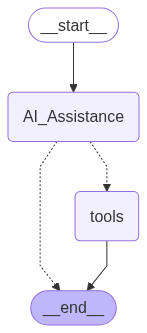

In [126]:
### Node definition
def ai_assistance(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("AI_Assistance", ai_assistance)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "AI_Assistance")
builder.add_conditional_edges(
    "AI_Assistance",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [127]:
messages=graph.invoke({"messages":"give me the latest news on AI and then multiply 5 by 10"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

give me the latest news on AI and then multiply 5 by 10
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (39823egyr)
 Call ID: 39823egyr
  Args:
    query: latest news on AI
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Latest AI Breakthroughs and News: May-June 2025 - Crescendo.ai", "url": "https://www.crescendo.ai/news/latest-ai-news-and-updates", "content": "Date: May 31, 2025  \nSummary: Internet analyst Mary Meekerâs new AI trends report highlights India and China as key innovation hubs, while also exploring the intensifying divide between open-source and closed AI ecosystems. The report suggests that collaboration and transparency will shape global AI leadership.  \nSource: NDTV\n\n### Global AI Scam Surge Hits $12.4B with Deepfakes and Voice Clo

### ReAct Architecture

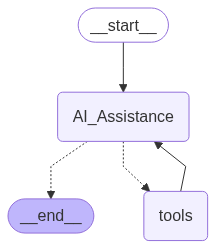

In [128]:
### Node definition
def ai_assistance(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("AI_Assistance", ai_assistance)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "AI_Assistance")
builder.add_conditional_edges(
    "AI_Assistance",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "AI_Assistance")

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [129]:
messages=graph.invoke({"messages":"give me the latest news on AI and then multiply 5 by 10"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

give me the latest news on AI and then multiply 5 by 10
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (bww59sa2p)
 Call ID: bww59sa2p
  Args:
    query: latest news on AI
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Latest AI Breakthroughs and News: May-June 2025 - Crescendo.ai", "url": "https://www.crescendo.ai/news/latest-ai-news-and-updates", "content": "Date: May 31, 2025  \nSummary: Internet analyst Mary Meekerâs new AI trends report highlights India and China as key innovation hubs, while also exploring the intensifying divide between open-source and closed AI ecosystems. The report suggests that collaboration and transparency will shape global AI leadership.  \nSource: NDTV\n\n### Global AI Scam Surge Hits $12.4B with Deepfakes and Voice Clo

### Adding Memory

In [130]:
messages=graph.invoke({"messages":"My name is Mayur"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

My name is Mayur
================================== Ai Message ==================================

Hello Mayur! Nice to meet you. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific! 😊


In [131]:
messages=graph.invoke({"messages":"what is my name"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is my name
================================== Ai Message ==================================

I don't have access to personal information or previous conversation history, so I don't know your name. If you'd like, you can share your name with me and I'll use it in our conversation!


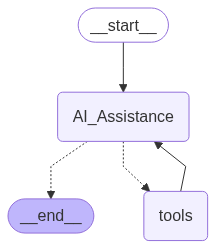

In [132]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
### Node definition
def ai_assistance(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("AI_Assistance", ai_assistance)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "AI_Assistance")
builder.add_conditional_edges(
    "AI_Assistance",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "AI_Assistance")

graph = builder.compile(checkpointer=memory)

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [133]:
config = {"configurable": {"thread_id": "1"}}
result = graph.invoke({"messages":"My name is Mayur"}, config=config)
result

{'messages': [HumanMessage(content='My name is Mayur', additional_kwargs={}, response_metadata={}, id='f5d29f99-ec2a-4e03-a325-cb9b2aa5caf1'),
  AIMessage(content='Hello Mayur! Nice to meet you. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific! 😊', additional_kwargs={'reasoning_content': 'Okay, the user said, "My name is Mayur." I need to figure out how to respond. Let me check the tools available. There\'s arxiv for academic papers, wikipedia for encyclopedic info, and Tavily search for general web results. But the user is just introducing themselves. They didn\'t ask a question or request information. Maybe they want to start a conversation. Since there\'s no explicit query, I shouldn\'t call any tools. My role is to assist, so perhaps I should acknowledge their introduction and ask how I can help them. That way, I can prompt them to provide more details or ask a question. Using a tool here wouldn\'t make sense becau

In [134]:
result["messages"][-1].content

'Hello Mayur! Nice to meet you. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific! 😊'

In [135]:
config = {"configurable": {"thread_id": "1"}}
result = graph.invoke({"messages":"What is my name"}, config=config)
result["messages"][-1].content

'Your name is Mayur, as you mentioned earlier. How can I assist you today, Mayur? 😊'

In [136]:
config = {"configurable": {"thread_id": "1"}}
result = graph.invoke({"messages":"you remembered my name?"}, config=config)
result["messages"][-1].content

'Yes, I remember your name, Mayur! I keep track of the conversation history, so I know you introduced yourself earlier. How can I assist you further? 😊'

### Streaming

Methods: .stream() and astream()

These methods are sync and async methods for streaming back results.
Additional parameters in streaming modes for graph state

- values : This streams the full state of the graph after each node is called.
- updates : This streams updates to the state of the graph after each node is called.

In [137]:

from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()

In [138]:

def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

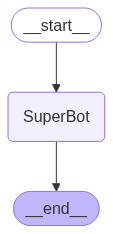

In [139]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [140]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Mayur And I like cricket"},config)

{'messages': [HumanMessage(content='Hi,My name is Mayur And I like cricket', additional_kwargs={}, response_metadata={}, id='aa8ebfee-f6dd-45e1-99a0-8598d79b5bb0'),
  AIMessage(content="\n<think>\nOkay, the user is Mayur and mentions liking cricket. I should respond warmly. Let me start by greeting him and expressing that I'm happy to meet him. Then, acknowledge his interest in cricket. Maybe ask if he follows any particular teams or players. Also, mention some popular teams and players like the Indian cricket team, Virat Kohli, or MS Dhoni. Keep it friendly and open-ended to encourage further conversation. Let me check for any typos or errors. Alright, that should work.\n</think>\n\nHello, Mayur! Nice to meet you. That's a great interest—cricket is such a thrilling sport! Do you follow any particular teams or players? I know the Indian cricket team has some amazing players like Virat Kohli, MS Dhoni, and many more. Let me know if you'd like to chat more about it! 😊", additional_kwargs

In [141]:
# Create a thread
#mode=updates
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Mayur And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="\n<think>\nOkay, the user introduced themselves as Mayur and mentioned they like cricket. I should respond warmly and maybe ask them about their favorite team or players to keep the conversation going. Let me make sure to use friendly language and show genuine interest. Maybe mention a popular team like the Indian cricket team since the name Mayur is common in India. I should also check for any typos and keep it concise.\n\nWait, should I ask about their favorite player or maybe if they follow the current tournaments? Hmm, maybe start with a greeting and then ask about their interest in cricket. Let me structure it so it flows naturally. Also, avoid using any technical terms they might not know. Keep it simple and engaging. Alright, let me put that together.\n</think>\n\nHi Mayur! Nice to meet you! Cricket is a fantastic sport—do you follow any particular team or player? If you're in India, I'm sure you're excited about the current cricket 

In [143]:
#mode=values
for chunk in graph_builder.stream({'messages':"Hi,My name is Mayur And I like cricket"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Mayur And I like cricket', additional_kwargs={}, response_metadata={}, id='c5e81624-0718-4def-b6bf-7208923bca97'), AIMessage(content="\n<think>\nOkay, the user introduced themselves as Mayur and mentioned they like cricket. I should respond warmly and maybe ask them about their favorite team or players to keep the conversation going. Let me make sure to use friendly language and show genuine interest. Maybe mention a popular team like the Indian cricket team since the name Mayur is common in India. I should also check for any typos and keep it concise.\n\nWait, should I ask about their favorite player or maybe if they follow the current tournaments? Hmm, maybe start with a greeting and then ask about their interest in cricket. Let me structure it so it flows naturally. Also, avoid using any technical terms they might not know. Keep it simple and engaging. Alright, let me put that together.\n</think>\n\nHi Mayur! Nice to meet you! Cricke